In [1]:
import xarray as xr
import numpy as np
import sys; sys.path.append('../')
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

In [12]:
R32 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R32/snapshots_*', decode_times=False, chunks={'time':1, 'zl':1}).isel(time=slice(None,None,6)).isel(xq=slice(None,None,8), xh=slice(None,None,8), yh=slice(None,None,8), yq=slice(None,None,8))

In [2]:
def KEz(ds, h=True):
    if h:
        return 0.5 * (ds.h * (remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))
    else:
        return 0.5 * ((remesh(ds.u**2, ds.h) + remesh(ds.v**2, ds.h)))

In [14]:
R4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann_old = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/CM26_grid_harmonic_ver3-FCT/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R4_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
# R2_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R1_ann = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0/output/snapshots*', decode_times=False).chunk({'time':1})

In [34]:
R2 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-long/bare/14500days/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_sadourny = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-long/bare-Sadourny/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R2_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R2_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R2_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
#R2_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R2-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [35]:
R4 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R4_sadourny = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-long/bare-Sadourny/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R4_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [6]:
R1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-long/bare-0.2-Sadourny/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_cs1 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-Cs-0.01/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_fct3 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-3/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})
R1_ann_fct0_cs0 = xr.open_mfdataset('/scratch/pp2681/mom6/Neverworld2/simulations/R1-ANN/May-16-FCT-0-Cs-0.00/output/snapshots*', decode_times=False).chunk({'time':1, 'zl':1})

In [15]:
files = ['snapshots_00000030.nc', 'snapshots_00001020.nc', 'snapshots_00002010.nc', 'snapshots_00003030.nc', 'snapshots_00004020.nc', 'snapshots_00005010.nc', 'snapshots_00006030.nc', 'snapshots_00007020.nc']
R4_ann_cs0 = xr.open_mfdataset([f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-Cs-0.00/{file}' for file in files], decode_times=False).chunk({'time':1, 'zl':1})
R4_ann_cs1 = xr.open_mfdataset([f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-Cs-0.01/{file}' for file in files], decode_times=False).chunk({'time':1, 'zl':1})
R4_ann_fct3 = xr.open_mfdataset([f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-FCT-3/{file}' for file in files], decode_times=False).chunk({'time':1, 'zl':1})
R4_ann_fct0 = xr.open_mfdataset([f'/scratch/pp2681/mom6/Neverworld2/simulations/R4-ANN/May-16-FCT-0-Cs-0.00/{file}' for file in files], decode_times=False).chunk({'time':1, 'zl':1})

In [16]:
import matplotlib as mpl

default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot(idx=0, zl=slice(None,None)):
    plt.figure(figsize=(14,6))
    for col, (exp, label) in enumerate(
        zip(
        [R4, R4_ann_cs0, R4_ann_cs1, R4_ann_fct0, R4_ann_fct3, R32],
        ['$1/4^{\circ}$', 
         '$1/4^{\circ}$, ANN+Cs=0.00',
         '$1/4^{\circ}$, ANN+Cs=0.01',
         '$1/4^{\circ}$, ANN+FCT0+Cs=0.00',
         '$1/4^{\circ}$, ANN+FCT3',
         '$1/32^{\circ}$']
        )):
        plt.subplot(1,6,col+1)
        KE = KEz(exp).isel(zl=zl).sum('zl')
        KE = KE.isel(time=idx%len(KE.time))
        im = KE.plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label, fontsize=10)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])
            
    plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')

In [17]:
import matplotlib as mpl
import matplotlib.patches as patches
default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot_max(idx=0, h=True):
    plt.figure(figsize=(12,6))
    for col, (exp, label) in enumerate(
        zip(
        [R4, R4_ann_cs0, R4_ann_cs1, R4_ann_fct0, R4_ann_fct3],
        ['$1/4^{\circ}$', 
         '$1/4^{\circ}$, ANN+Cs=0.00',
         '$1/4^{\circ}$, ANN+Cs=0.01',
         '$1/4^{\circ}$, ANN+FCT0+Cs=0.00',
         '$1/4^{\circ}$, ANN+FCT3']
        )):
        pass
        plt.subplot(1,5,col+1)
        KE = KEz(exp,h=h)
        KE = KE.isel(time=idx%len(KE.time)).compute()
        maxval = round(float(KE.max()),2)
        layer = int(KE.max(['xh','yh']).argmax('zl'))
        coord = KE.isel(zl=layer).argmax(['xh','yh'])
        x = float(KE.xh[int(coord['xh'])])
        y = float(KE.yh[int(coord['yh'])])
        im = KE.isel(zl=layer).plot.imshow(
            norm=mpl.colors.LogNorm(vmin=1, vmax=1e+3) if h else mpl.colors.LogNorm(vmin=1e-1, vmax=10),
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().add_patch(patches.Rectangle((x-10,y-10),20,20,edgecolor='g', facecolor='none', lw=2))
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label+f'\n Layer={layer}, max={maxval}', fontsize=12)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])

    if h:
        plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')
    else:
        plt.colorbar(im, pad=0.08, aspect=100, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^2 \mathrm{s}^{-2}$')

CPU times: user 7.53 s, sys: 3.27 s, total: 10.8 s
Wall time: 37.6 s


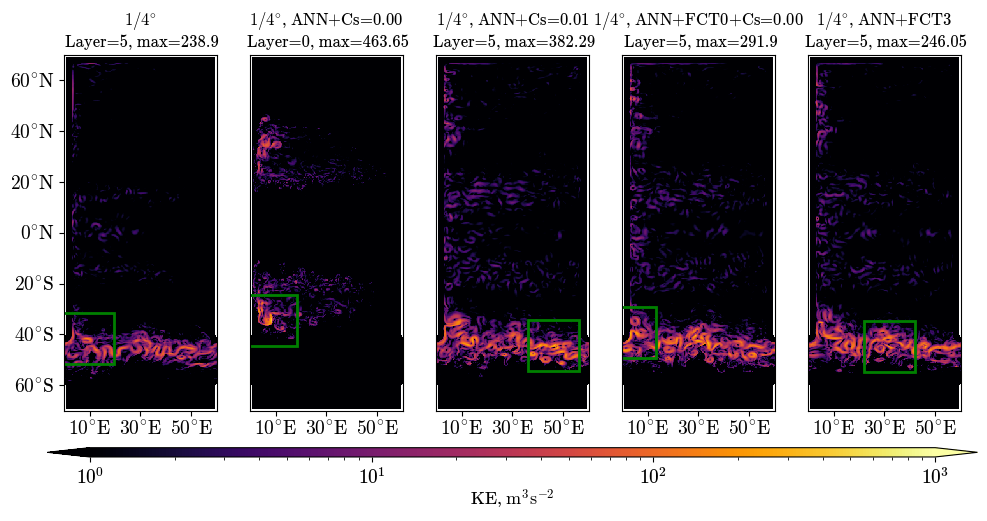

In [18]:
%time plot_max(265)

CPU times: user 5.41 s, sys: 2.24 s, total: 7.65 s
Wall time: 17.9 s


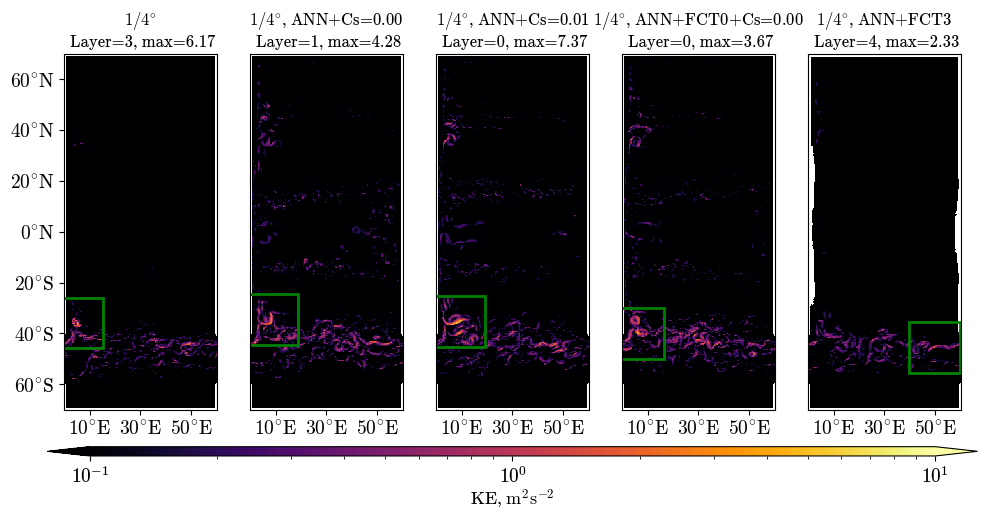

In [10]:
%time plot_max(-1,h=False)

CPU times: user 9.94 s, sys: 4.09 s, total: 14 s
Wall time: 45.2 s


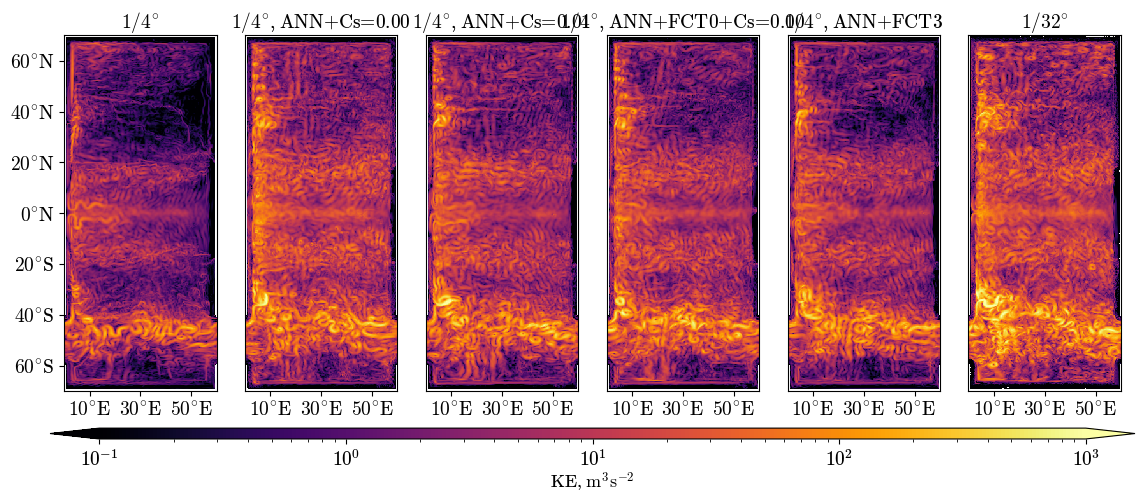

In [15]:
%time plot(265,zl=slice(None,None))

In [20]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(lambda idx: plot_max(idx, False), list(np.arange(50,60)) + list(np.arange(100,110))+list(np.arange(200,210)) + list(np.arange(250,260)), FPS=4, filename='May16_NW2_R4_max_False.mp4', dpi=150)
#%time create_animation_ffmpeg(plot, range(230,260), FPS=15, filename='May16_NW2_R4.mp4', dpi=150)

Native resolution of snapshots is used: 1480x772

Animation May16_NW2_R4_max_False.mp4 at FPS=4 will last for 10.0 seconds. The frames are saved to 
.ffmpeg/May16_NW2_R4_max_False

Running the command:
cd /scratch/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/offline_analysis; ffmpeg -y -framerate 4 -i .ffmpeg/May16_NW2_R4_max_False/frame-%d.png -s:v 1480x772 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p May16_NW2_R4_max_False.mp4


sh: 1: module: not found
ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --en

CPU times: user 4min 6s, sys: 1min 38s, total: 5min 45s
Wall time: 7min 1s


frame=   40 fps= 32 q=-1.0 Lsize=    1846kB time=00:00:09.25 bitrate=1634.6kbits/s speed= 7.5x    
video:1844kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.071054%
[libx264 @ 0x55a4f7a03480] frame I:1     Avg QP: 6.76  size: 74663
[libx264 @ 0x55a4f7a03480] frame P:10    Avg QP:14.28  size: 49860
[libx264 @ 0x55a4f7a03480] frame B:29    Avg QP:16.21  size: 45336
[libx264 @ 0x55a4f7a03480] consecutive B-frames:  2.5%  0.0%  7.5% 90.0%
[libx264 @ 0x55a4f7a03480] mb I  I16..4: 68.5%  2.7% 28.7%
[libx264 @ 0x55a4f7a03480] mb P  I16..4:  4.5%  1.1% 14.0%  P16..4:  5.9%  2.2%  1.5%  0.0%  0.0%    skip:70.8%
[libx264 @ 0x55a4f7a03480] mb B  I16..4:  2.4%  0.3%  9.1%  B16..8: 11.0%  3.5%  1.7%  direct: 1.6%  skip:70.4%  L0:52.5% L1:42.9% BI: 4.6%
[libx264 @ 0x55a4f7a03480] 8x8 transform intra:3.3% inter:3.8%
[libx264 @ 0x55a4f7a03480] coded y,uvDC,uvAC intra: 62.4% 76.8% 76.0% inter: 5.4% 9.4% 9.1%
[libx264 @ 0x55a4f7a03480] i16 v,h,dc,p: 77% 15%  7%  0%
[lib

# For Wenda Zhang

In [36]:
import matplotlib as mpl

default_rcParams({'figure.subplot.wspace': 0.0, 'figure.subplot.hspace': 0.3, 'font.size': 14})

def plot(idx=0, surface=True):
    plt.figure(figsize=(8,6))
    for col, (exp, label) in enumerate(
        zip(
        [R4, R4_sadourny, R4_ann_cs1],
        ['$1/4^{\circ}$, \n ARAKAWA-HSU \n BOUND_CORIOLIS=False', 
         '$1/4^{\circ}$, \n SADOURNY75_ENERGY \n BOUND_CORIOLIS=True', 
         '$1/4^{\circ}$, \n SADOURNY75_ENERGY \n BOUND_CORIOLIS=True \n + ANN']
        )):
        plt.subplot(1,3,col+1)
        if surface:
            KE = KEz(exp, h=False).isel(zl=0)
            norm=mpl.colors.LogNorm(vmin=5e-5, vmax=6)
        else:
            KE = KEz(exp, h=True).sum('zl')
            norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e+3)
        KE = KE.isel(time=idx%len(KE.time))
        im = KE.plot.imshow(
            norm=norm,
            cmap='inferno',
            add_colorbar=False,
            interpolation='none'
        )
        plt.gca().axes.set_aspect('equal')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(label, fontsize=10)
        lons = [10,30,50]
        plt.xticks(lons, [f'${lon}^'+'{\circ}$E' for lon in lons])
        if col==0:
            lats = [-60, -40, -20, 0, 20, 40, 60]
            lat_ticks = [f'${-lat}^'+'{\circ}$S' if lat<0 else f'${lat}^'+'{\circ}$N' for lat in lats]
            plt.yticks(lats, lat_ticks)
        else:
            plt.yticks([])
    if surface:
        plt.colorbar(im, pad=0.08, aspect=30, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='KE, $\mathrm{m}^2 \mathrm{s}^{-2}$')
    else:
        plt.colorbar(im, pad=0.08, aspect=30, orientation='horizontal', ax=plt.gcf().axes, extend='both').set_label(fontsize=13, label='Depth-integrated KE, $\mathrm{m}^3 \mathrm{s}^{-2}$')

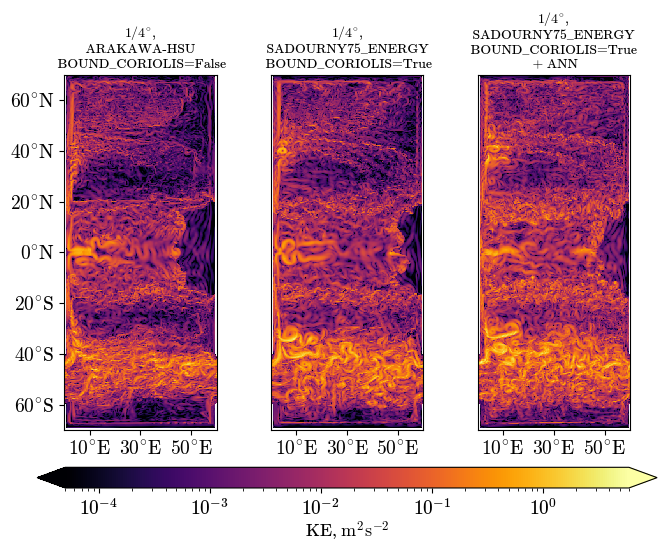

In [37]:
plot(-1)

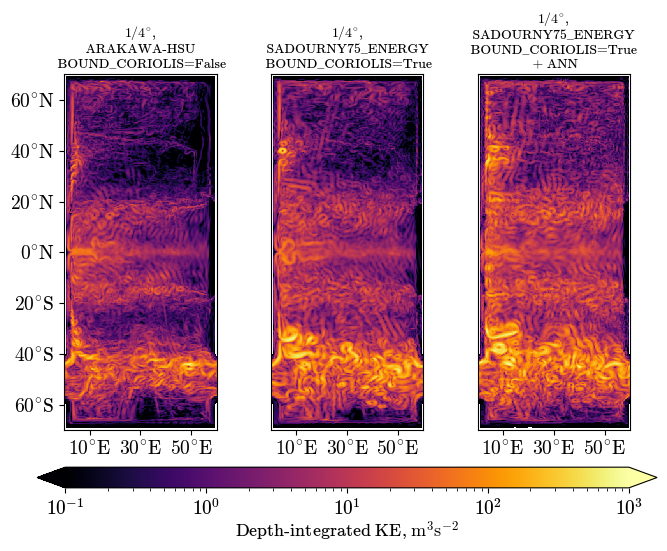

In [39]:
plot(-1, surface=False)

In [41]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(lambda idx: plot(idx,False), range(-2,-1), FPS=4, filename='Sadourny_for_Wenda_R4_full_depth.mp4', dpi=150)

Native resolution of snapshots is used: 998x822

Animation Sadourny_for_Wenda_R4_full_depth.mp4 at FPS=4 will last for 3.5 seconds. The frames are saved to 
.ffmpeg/Sadourny_for_Wenda_R4_full_depth

Running the command:
cd /scratch/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/offline_analysis; ffmpeg -y -framerate 4 -i .ffmpeg/Sadourny_for_Wenda_R4_full_depth/frame-%d.png -s:v 998x822 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p Sadourny_for_Wenda_R4_full_depth.mp4


sh: 1: module: not found
ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --en

CPU times: user 1min 24s, sys: 32.9 s, total: 1min 57s
Wall time: 3min 11s


frame=   14 fps=0.0 q=-1.0 Lsize=    1494kB time=00:00:02.75 bitrate=4450.2kbits/s speed=9.23x    
video:1493kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.068160%
[libx264 @ 0x5577270aef00] frame I:1     Avg QP:13.56  size:156876
[libx264 @ 0x5577270aef00] frame P:4     Avg QP:19.09  size:110842
[libx264 @ 0x5577270aef00] frame B:9     Avg QP:20.03  size:103091
[libx264 @ 0x5577270aef00] consecutive B-frames: 14.3%  0.0%  0.0% 85.7%
[libx264 @ 0x5577270aef00] mb I  I16..4: 31.8% 31.2% 37.0%
[libx264 @ 0x5577270aef00] mb P  I16..4:  0.1% 18.7% 13.5%  P16..4:  2.7%  4.5%  5.9%  0.0%  0.0%    skip:54.5%
[libx264 @ 0x5577270aef00] mb B  I16..4:  0.0%  9.6% 13.8%  B16..8:  4.4%  7.5%  7.2%  direct: 2.4%  skip:55.0%  L0:25.7% L1:22.4% BI:51.9%
[libx264 @ 0x5577270aef00] 8x8 transform intra:43.7% inter:58.0%
[libx264 @ 0x5577270aef00] coded y,uvDC,uvAC intra: 89.2% 88.2% 88.1% inter: 21.5% 23.3% 22.7%
[libx264 @ 0x5577270aef00] i16 v,h,dc,p: 83% 10%  6%  1%

In [42]:
from helpers.plot_helpers import create_animation_ffmpeg
%time create_animation_ffmpeg(lambda idx: plot(idx,False), range(-2,-1), FPS=4, filename='Sadourny_for_Wenda_R4_full_depth_dpi.mp4', dpi=400)

Native resolution of snapshots is used: 2662x2180

Animation Sadourny_for_Wenda_R4_full_depth_dpi.mp4 at FPS=4 will last for 0.2 seconds. The frames are saved to 
.ffmpeg/Sadourny_for_Wenda_R4_full_depth_dpi

Running the command:
cd /scratch/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/offline_analysis; ffmpeg -y -framerate 4 -i .ffmpeg/Sadourny_for_Wenda_R4_full_depth_dpi/frame-%d.png -s:v 2662x2180 -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p Sadourny_for_Wenda_R4_full_depth_dpi.mp4


sh: 1: module: not found
ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --en

CPU times: user 6.24 s, sys: 2.37 s, total: 8.61 s
Wall time: 11 s


frame=    1 fps=0.0 q=19.0 Lsize=     559kB time=00:00:00.00 bitrate=75130754.1kbits/s speed=0.000161x    
video:559kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.143869%
[libx264 @ 0x55fb61efb8c0] frame I:1     Avg QP:18.10  size:571360
[libx264 @ 0x55fb61efb8c0] mb I  I16..4: 24.1% 53.0% 22.8%
[libx264 @ 0x55fb61efb8c0] 8x8 transform intra:53.0%
[libx264 @ 0x55fb61efb8c0] coded y,uvDC,uvAC intra: 48.3% 45.9% 45.2%
[libx264 @ 0x55fb61efb8c0] i16 v,h,dc,p: 82% 14%  3%  0%
[libx264 @ 0x55fb61efb8c0] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 38% 15% 16%  3%  5%  5%  6%  5%  6%
[libx264 @ 0x55fb61efb8c0] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 41% 26%  8%  4%  4%  4%  5%  4%  5%
[libx264 @ 0x55fb61efb8c0] i8c dc,h,v,p: 67% 14% 13%  7%
[libx264 @ 0x55fb61efb8c0] kb/s:18283.52
